<a href="https://colab.research.google.com/github/EronDS/Bioinformatics/blob/main/Tools_for_Bioinformatics/MendelianInheritance/Linkage_%26_Recombination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np 
import math  
import collections
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
def linkage_chromossomes(percentage_of_crossingover = .1, number_of_cells = 1000,geneA = ['A'], geneB = ['B'], cis = True):
        fq = percentage_of_crossingover
        t = number_of_cells
        fr = fq / 2 

        r = fr * t

        if cis == True:
            p1 = list(geneA)[0].upper() * 2 + list(geneB)[0].upper() * 2
            p2 = list(geneA)[0].lower() * 2 + list(geneB)[0].lower() * 2
        if cis != True:
            p1 = list(geneA)[0].upper() * 2 +  list(geneB)[0].lower() * 2
            p2 = list(geneA)[0].lower() * 2 + list(geneB)[0].upper() * 2


        cM = fr * 100 


        print('Parental Chromossomes:')
        print('P1:' + p1[0] + p1[2] + '/' + p1[1] +  p1[3])
        print('P1:' + p2[0] + p2[2] + '/' + p2[1] +  p2[3])


        f1 = p1[0] + p2[0] + p1[2] + p2[2]
        print('F1:' + f1[0] + f1[2] + '/' + f1[1] + f1[3])

        print('Recombinants Gametes:' + f1[0] + f1[3] +  ',' + f1[1] + f1[2] )
        print('Paternal  Gametes:' + f1[0] + f1[2] + ',' + f1[1] + f1[3])


        recomb_gs_1 = f1[0] + f1[3]
        recomb_gs_2 = f1[1] + f1[2]

        paternal_gs_1 = f1[0] + f1[2]
        paternal_gs_2 = f1[1] + f1[3]

        recomb_gametes = int((fr * number_of_cells) * 4) # 4 gametes for each cell (Meiosis)
        paternal_gametes = int(((1 - fr) * number_of_cells)  * 4)

        pool = []

        for i in range(recomb_gametes):
            if i >= recomb_gametes // 2:
                pool.append(recomb_gs_1)
            else:
                pool.append(recomb_gs_2)

        for i in range(paternal_gametes):
            if i >= paternal_gametes // 2:
                pool.append(paternal_gs_1)
            else:
                pool.append(paternal_gs_2)

        pool = dict(collections.Counter(pool))

        print('Frequency of Recombination: {}'.format(fr))
        print('Frequency of Crossing-Over (observed by chiasmas): {}'.format(fq))

        
        plt.bar(range(len(pool)), list(pool.values()), align='center',
                color = 'skyblue')
        plt.xticks(range(len(pool)), list(pool.keys()), fontsize = 13)
        sns.despine()


        print('Genes: {}cM (centimorgans) far apart'.format(fr * 100))




            
            


        
        
        return pool

Parental Chromossomes:
P1:RS/RS
P1:rs/rs
F1:RS/rs
Recombinants Gametes:Rs,rS
Paternal  Gametes:RS,rs
Frequency of Recombination: 0.05
Frequency of Crossing-Over (observed by chiasmas): 0.1
Genes: 5.0cM (centimorgans) far apart


{'RS': 1900, 'Rs': 100, 'rS': 100, 'rs': 1900}

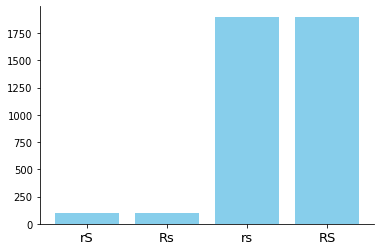

In [100]:
cis = linkage_chromossomes(geneA = ['R'], geneB = ['S'] , cis = True)
cis

Parental Chromossomes:
P1:Rs/Rs
P1:rS/rS
F1:Rs/rS
Recombinants Gametes:RS,rs
Paternal  Gametes:Rs,rS
Frequency of Recombination: 0.05
Frequency of Crossing-Over (observed by chiasmas): 0.1
Genes: 5.0cM (centimorgans) far apart


{'RS': 100, 'Rs': 1900, 'rS': 1900, 'rs': 100}

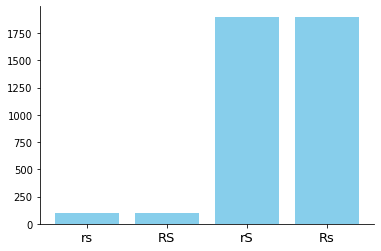

In [101]:
trans = linkage_chromossomes(geneA = ['R'], geneB = ['S'] , cis = False)
trans